# Auswertung

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")
plt.rc("font", size=14)

## Load data

In [2]:
metrics = pd.read_csv("results/architecture_metrics.csv", delimiter=";")
metrics.describe()

,sparsity,quantized,params,nonzero_params,actual_sparsity,loss,top-1,top-3,val_loss,val_top-1,val_top-3,file_size,inference_time,peak_mem,compressed_file_size
count,40.000000,40.00000,4.000000e+01,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.450000,0.50000,3.070350e+06,1.808284e+06,0.410470,0.754525,0.751345,0.928963,1.069022,0.673253,0.897135,7.943370,6253.000000,10.785352,4.789028
std,0.339683,0.50637,1.048516e+06,1.208850e+06,0.320560,0.449663,0.150018,0.068122,0.292360,0.109357,0.055501,5.276717,3530.201469,4.992272,4.084116
min,0.000000,0.00000,1.540218e+06,2.525190e+05,0.000000,0.178400,0.418400,0.750600,0.719400,0.396300,0.748700,1.953900,2183.000000,5.203100,0.533700
25%,0.225000,0.00000,2.270794e+06,7.054388e+05,0.183525,0.467075,0.677100,0.910275,0.857925,0.628500,0.885400,3.614900,2944.000000,6.919950,1.868925
50%,0.450000,0.50000,3.239114e+06,1.624850e+06,0.396950,0.576450,0.808300,0.961050,0.991400,0.714650,0.921000,5.664450,5107.500000,9.093750,3.312450
75%,0.675000,1.00000,4.062381e+06,2.576093e+06,0.628050,0.946000,0.860000,0.976525,1.182825,0.750875,0.933100,12.845300,8640.750000,16.108425,6.541650
max,0.900000,1.00000,4.239242e+06,4.239242e+06,0.861800,1.744700,0.947100,0.994200,1.854400,0.789100,0.955600,16.882900,12453.000000,20.472700,15.689400


In [3]:
fancy_columns = {
    "architectures" : "Architekturen",
    "params" : "Parameter",
    "loss" : "Loss",
    "top-1" : "Top-1",
    "top-3" : "Top-3",
    "val_loss" : "Loss (Test)",
    "val_top-1" : "Top-1 (Test)",
    "val_top-3" : "Top-3 (Test)",
    "sparsity" : "Sparsity",
    "actual_sparsity" : "Exakte Sparsity",
    "file_size" : "Datei [MB]",
    "inference_time" : "Inferenz [µs]",
    "peak_mem" : "RAM [MB]"
}

architecture_order = [
    "MobileNet", 
    "MobileNetV2", 
    "MobileNetV3 Large", 
    "MobileNetV3 Small", 
    "EfficientNet-B0"
]

## Training

### Tabelle um Architekturen zusammenzufassen

In [4]:
df = metrics[(metrics["quantized"] == 0) & (metrics["sparsity"] == 0)]
df = df[["architectures", "params", "top-1", "top-3", "val_top-1", "val_top-3"]]
df["params"] = df["params"].map(lambda x: "{:.1f} Mio.".format(x/1e6))
df = df.reset_index(drop=True)
df = df.rename(columns=fancy_columns)
df

,Architekturen,Parameter,Top-1,Top-3,Top-1 (Test),Top-3 (Test)
0,MobileNet,3.2 Mio.,0.8140,0.9650,0.7277,0.9226
1,MobileNetV2,2.3 Mio.,0.8460,0.9715,0.7325,0.9263
2,MobileNetV3 Large,4.2 Mio.,0.7749,0.9485,0.6934,0.9064
3,MobileNetV3 Small,1.5 Mio.,0.7530,0.9451,0.6687,0.9033
4,EfficientNet-B0,4.1 Mio.,0.8400,0.9694,0.7514,0.9296


In [5]:
print(df.to_latex(index=False))

\begin{tabular}{llrrrr}
\toprule
    Architekturen & Parameter &  Top-1 &  Top-3 &  Top-1 (Test) &  Top-3 (Test) \\
\midrule
        MobileNet &  3.2 Mio. & 0.8140 & 0.9650 &        0.7277 &        0.9226 \\
      MobileNetV2 &  2.3 Mio. & 0.8460 & 0.9715 &        0.7325 &        0.9263 \\
MobileNetV3 Large &  4.2 Mio. & 0.7749 & 0.9485 &        0.6934 &        0.9064 \\
MobileNetV3 Small &  1.5 Mio. & 0.7530 & 0.9451 &        0.6687 &        0.9033 \\
  EfficientNet-B0 &  4.1 Mio. & 0.8400 & 0.9694 &        0.7514 &        0.9296 \\
\bottomrule
\end{tabular}



### Performance auf dem Raspberry Pi nach dem Training

In [6]:
df = metrics[(metrics["quantized"] == 0) & (metrics["sparsity"] == 0)]
df = df[["architectures", "params", "file_size", "peak_mem", "inference_time"]]
df["params"] = df["params"].map(lambda x: "{:.1f} Mio.".format(x/1e6))
df = df.rename(columns=fancy_columns)
df

,Architekturen,Parameter,Datei [MB],RAM [MB],Inferenz [µs]
0,MobileNet,3.2 Mio.,12.8453,16.1016,11803
8,MobileNetV2,2.3 Mio.,8.9153,11.2148,4961
16,MobileNetV3 Large,4.2 Mio.,16.8829,20.4141,8051
24,MobileNetV3 Small,1.5 Mio.,6.1536,8.5859,2954
32,EfficientNet-B0,4.1 Mio.,16.0860,16.6719,12453


In [7]:
print(df.to_latex(index=False))

\begin{tabular}{llrrr}
\toprule
    Architekturen & Parameter &  Datei [MB] &  RAM [MB] &  Inferenz [µs] \\
\midrule
        MobileNet &  3.2 Mio. &     12.8453 &   16.1016 &          11803 \\
      MobileNetV2 &  2.3 Mio. &      8.9153 &   11.2148 &           4961 \\
MobileNetV3 Large &  4.2 Mio. &     16.8829 &   20.4141 &           8051 \\
MobileNetV3 Small &  1.5 Mio. &      6.1536 &    8.5859 &           2954 \\
  EfficientNet-B0 &  4.1 Mio. &     16.0860 &   16.6719 &          12453 \\
\bottomrule
\end{tabular}



## Quantisierung

### Verbesserung durch Quantisierung

Text(0, 0.5, 'Veränderung [%]')

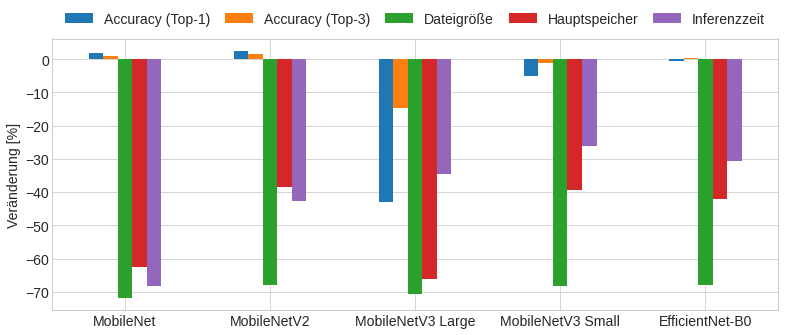

In [8]:
df_not_q = metrics[(metrics["quantized"] == 0) & (metrics["sparsity"] == 0)]
df_not_q = df_not_q[["architectures", "val_top-1", "val_top-3", "file_size", "peak_mem", "inference_time"]]
df_not_q = df_not_q.set_index("architectures")

df_quant = metrics[(metrics["quantized"] == 1) & (metrics["sparsity"] == 0)]
df_quant = df_quant[["architectures", "val_top-1", "val_top-3", "file_size", "peak_mem", "inference_time"]]
df_quant = df_quant.set_index("architectures")

df_quant["impr_val_top-1"] = (df_quant["val_top-1"] / df_not_q["val_top-1"] - 1) * 100
df_quant["impr_val_top-3"] = (df_quant["val_top-3"] / df_not_q["val_top-3"] - 1) * 100
df_quant["impr_file_size"] = (df_quant["file_size"] / df_not_q["file_size"] - 1) * 100
df_quant["impr_peak_mem"] = (df_quant["peak_mem"] / df_not_q["peak_mem"] - 1) * 100
df_quant["impr_inference_time"] = (df_quant["inference_time"] / df_not_q["inference_time"] - 1) * 100

col_names = {
    "impr_val_top-1" : "Accuracy (Top-1)",
    "impr_val_top-3" : "Accuracy (Top-3)",
    "impr_file_size" : "Dateigröße",
    "impr_peak_mem" : "Hauptspeicher",
    "impr_inference_time" : "Inferenzzeit"
}

df = df_quant[["impr_val_top-1", "impr_val_top-3", "impr_file_size", "impr_peak_mem", "impr_inference_time"]]
df = df.rename(columns=col_names)

fig, ax = plt.subplots(1, figsize=(13, 5))
df.plot.bar(ax=ax, rot=0)
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=5)
ax.set_xlabel("")
ax.set_ylabel("Veränderung [%]")

#fig.savefig("quantization_improvements.pdf", bbox_inches='tight')

In [9]:
df

,Accuracy (Top-1),Accuracy (Top-3),Dateigröße,Hauptspeicher,Inferenzzeit
architectures,,,,,
MobileNet,1.703999,0.932148,-71.858189,-62.639738,-68.228417
MobileNetV2,2.484642,1.597755,-67.891153,-38.348432,-42.693005
MobileNetV3 Large,-42.846842,-14.574139,-70.715932,-66.035289,-34.678922
MobileNetV3 Small,-5.054584,-1.184546,-68.247855,-39.399481,-26.100203
EfficientNet-B0,-0.665425,0.301205,-67.827303,-42.197950,-30.707460


In [10]:
col_names = fancy_columns.copy()
col_names["val_top-1"] = "Top-1"
col_names["val_top-3"] = "Top-3"

df = metrics[(metrics["quantized"] == 1) & (metrics["sparsity"] == 0)]
df = df[["architectures", "val_top-1", "val_top-3", "file_size", "peak_mem", "inference_time"]]
df = df.rename(columns=col_names)
df

,Architekturen,Top-1,Top-3,Datei [MB],RAM [MB],Inferenz [µs]
4,MobileNet,0.7401,0.9312,3.6149,6.01560,3750
12,MobileNetV2,0.7507,0.9411,2.8626,6.91410,2843
20,MobileNetV3 Large,0.3963,0.7743,4.9440,6.93359,5259
28,MobileNetV3 Small,0.6349,0.8926,1.9539,5.20310,2183
36,EfficientNet-B0,0.7464,0.9324,5.1753,9.63670,8629


In [11]:
print(df.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
    Architekturen &  Top-1 &  Top-3 &  Datei [MB] &  RAM [MB] &  Inferenz [µs] \\
\midrule
        MobileNet & 0.7401 & 0.9312 &      3.6149 &   6.01560 &           3750 \\
      MobileNetV2 & 0.7507 & 0.9411 &      2.8626 &   6.91410 &           2843 \\
MobileNetV3 Large & 0.3963 & 0.7743 &      4.9440 &   6.93359 &           5259 \\
MobileNetV3 Small & 0.6349 & 0.8926 &      1.9539 &   5.20310 &           2183 \\
  EfficientNet-B0 & 0.7464 & 0.9324 &      5.1753 &   9.63670 &           8629 \\
\bottomrule
\end{tabular}



## Pruning

### Genauigkeit vs Sparsity

(0.45, 0.8)

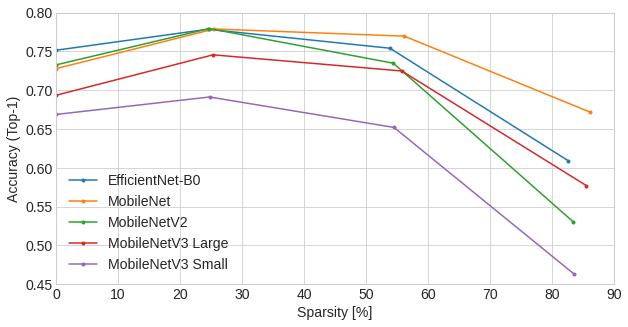

In [12]:
df_all = metrics[metrics["quantized"] == 0]
df_all = df_all[["architectures", "actual_sparsity", "val_top-1"]]
df_all["actual_sparsity"] *= 100 
df_all_grouped = df_all.groupby("architectures")

fig, ax = plt.subplots(1, figsize=(10, 5))
for label, df in df_all_grouped:
    df.plot(x="actual_sparsity", y="val_top-1", marker=".", ax=ax, label=label)

ax.set_xlabel("Sparsity [%]")
ax.set_ylabel("Accuracy (Top-1)")
ax.set_xlim(0, 90)
ax.set_ylim(0.45, 0.80)

#fig.savefig("sparsity_vs_accuracy.pdf", bbox_inches='tight')

In [13]:
df_all

,architectures,actual_sparsity,val_top-1
0,MobileNet,0.00,0.7277
1,MobileNet,25.53,0.7788
2,MobileNet,56.21,0.7695
3,MobileNet,86.18,0.6716
8,MobileNetV2,0.00,0.7325
9,MobileNetV2,24.72,0.7793
10,MobileNetV2,54.41,0.7347
11,MobileNetV2,83.43,0.5305
16,MobileNetV3 Large,0.00,0.6934
17,MobileNetV3 Large,25.34,0.7455


(0.0, 90.0)

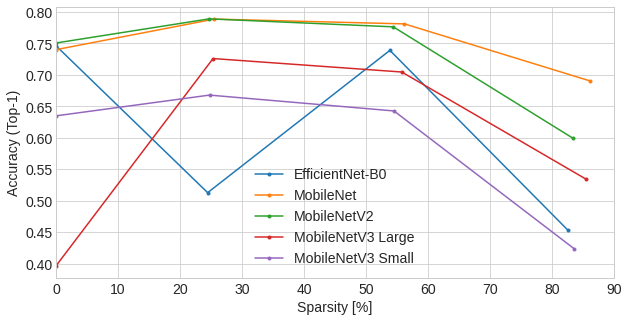

In [14]:
df_all = metrics[metrics["quantized"] == 1]
df_all = df_all[["architectures", "actual_sparsity", "val_top-1"]]
df_all["actual_sparsity"] *= 100 
df_all = df_all.groupby("architectures")

fig, ax = plt.subplots(1, figsize=(10, 5))
for label, df in df_all:
    df.plot(x="actual_sparsity", y="val_top-1", marker=".", ax=ax, label=label)

ax.set_xlabel("Sparsity [%]")
ax.set_ylabel("Accuracy (Top-1)")
ax.set_xlim(0, 90)

#fig.savefig("sparsity_vs_accuracy_quantized.pdf", bbox_inches='tight')

### Restlichen Metriken inklusive der tatsächlichen Sparsity

In [15]:
df = metrics[metrics["quantized"] == 1]
df = df[["architectures", "sparsity", "actual_sparsity", "file_size", "peak_mem", "inference_time"]]
df["sparsity"] = df["sparsity"].map(lambda x: "{}%".format(int(x*100)))
df["actual_sparsity"] = df["actual_sparsity"].map(lambda x: "{:.2f}%".format(x*100))
df = df.rename(columns=fancy_columns)
df = df.set_index(["Architekturen", "Sparsity"])
df

Exakte Sparsity  Datei [MB]  RAM [MB]  \
Architekturen     Sparsity                                         
MobileNet         0%                 0.00%      3.6149   6.01560   
                  30%               25.53%      3.6149   6.05470   
                  60%               56.21%      3.6149   6.16010   
                  90%               86.18%      3.6147   6.16020   
MobileNetV2       0%                 0.00%      2.8626   6.91410   
                  30%               24.72%      2.8626   6.87500   
                  60%               54.41%      2.8626   6.92580   
                  90%               83.43%      2.8626   6.92190   
MobileNetV3 Large 0%                 0.00%      4.9440   6.93359   
                  30%               25.34%      4.9440   6.97270   
                  60%               55.78%      4.9440   6.98050   
                  90%               85.53%      4.9440   6.97660   
MobileNetV3 Small 0%                 0.00%      1.9539   5.20310   
                  30%               24.77%      1.9539   5.29690   
                  60%               54.52%      1.9539   5.40230   
                  90%               83.60%      1.9539   5.28520   
EfficientNet-B0   0%                 0.00%      5.1753   9.63670   
                  30%               24.47%      5.1753   9.56640   
                  60%               53.86%      5.1753   9.58590   
                  90%               82.59%      5.1753   9.63280   

                            Inferenz [µs]  
Architekturen     Sparsity                 
MobileNet         0%                 3750  
                  30%                3798  
                  60%                3812  
                  90%                3802  
MobileNetV2       0%                 2843  
                  30%                2845  
                  60%                2842  
                  90%                2862  
MobileNetV3 Large 0%                 5259  
                  30%                5243  
                  60%                5292  
                  90%                5263  
MobileNetV3 Small 0%                 2183  
                  30%                2196  
                  60%                2187  
                  90%                2192  
EfficientNet-B0   0%                 8629  
                  30%                8586  
                  60%                8734  
                  90%                8676

In [16]:
print(df.to_latex())

\begin{tabular}{lllrrr}
\toprule
                &     & Exakte Sparsity &  Datei [MB] &  RAM [MB] &  Inferenz [µs] \\
Architekturen & Sparsity &                 &             &           &                \\
\midrule
MobileNet & 0\% &           0.00\% &      3.6149 &   6.01560 &           3750 \\
                & 30\% &          25.53\% &      3.6149 &   6.05470 &           3798 \\
                & 60\% &          56.21\% &      3.6149 &   6.16010 &           3812 \\
                & 90\% &          86.18\% &      3.6147 &   6.16020 &           3802 \\
MobileNetV2 & 0\% &           0.00\% &      2.8626 &   6.91410 &           2843 \\
                & 30\% &          24.72\% &      2.8626 &   6.87500 &           2845 \\
                & 60\% &          54.41\% &      2.8626 &   6.92580 &           2842 \\
                & 90\% &          83.43\% &      2.8626 &   6.92190 &           2862 \\
MobileNetV3 Large & 0\% &           0.00\% &      4.9440 &   6.93359 &           5259 \\
  

### Größe der komprimierten Modelle

Text(0, 0.5, 'Komprimierte Dateigröße [MB]')

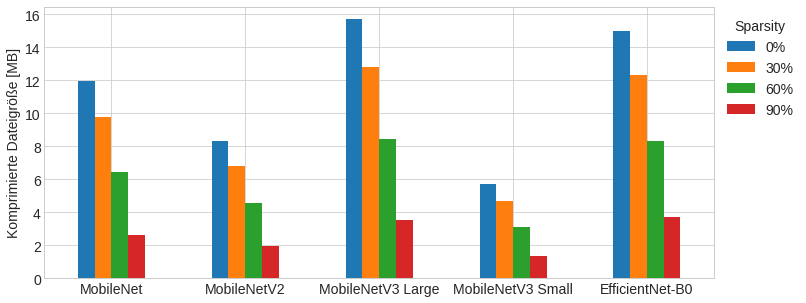

In [17]:
df = metrics[metrics["quantized"] == 0][["architectures", "sparsity", "compressed_file_size"]]
df["sparsity"] = df["sparsity"].map(lambda x: "{}%".format(int(x*100)))


ptable = pd.pivot_table(
    data=df,
    values="compressed_file_size",
    index="architectures",
    columns="sparsity"
).reindex(architecture_order)

fig, ax = plt.subplots(1, figsize=(12, 5))
ptable.plot.bar(ax=ax, rot=0)
ax.legend(bbox_to_anchor=(1, 1), loc="upper left", title="Sparsity")
ax.set_xlabel("")
ax.set_ylabel("Komprimierte Dateigröße [MB]")

#fig.savefig("pruned_and_compressed.pdf", bbox_inches='tight')

In [18]:
ptable

sparsity,0%,30%,60%,90%
architectures,,,,
MobileNet,11.9705,9.7589,6.4475,2.6302
MobileNetV2,8.3200,6.8241,4.5646,1.9501
MobileNetV3 Large,15.6894,12.7800,8.4288,3.5205
MobileNetV3 Small,5.6994,4.6611,3.1044,1.3524
EfficientNet-B0,14.9679,12.3008,8.3102,3.7047


Text(0, 0.5, 'Komprimierte Dateigröße [MB]')

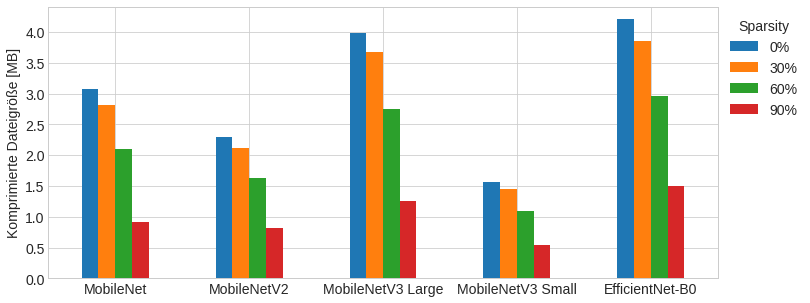

In [19]:
df = metrics[metrics["quantized"] == 1][["architectures", "sparsity", "compressed_file_size"]]
df["sparsity"] = df["sparsity"].map(lambda x: "{}%".format(int(x*100)))


ptable = pd.pivot_table(
    data=df,
    values="compressed_file_size",
    index="architectures",
    columns="sparsity"
).reindex(architecture_order)

fig, ax = plt.subplots(1, figsize=(12, 5))
ptable.plot.bar(ax=ax, rot=0)
ax.legend(bbox_to_anchor=(1, 1), loc="upper left", title="Sparsity")
ax.set_xlabel("")
ax.set_ylabel("Komprimierte Dateigröße [MB]")

#fig.savefig("pruned_and_compressed_quantized.pdf", bbox_inches='tight')

In [20]:
ptable

sparsity,0%,30%,60%,90%
architectures,,,,
MobileNet,3.0676,2.8213,2.0976,0.9179
MobileNetV2,2.2957,2.1232,1.6254,0.8167
MobileNetV3 Large,3.9812,3.6720,2.7480,1.2544
MobileNetV3 Small,1.5608,1.4438,1.0944,0.5337
EfficientNet-B0,4.2051,3.8602,2.9555,1.5011


### Anteil der Depthwise Convolutions

In [21]:
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Large, MobileNetV3Small, EfficientNetB0
from tensorflow.keras.layers import DepthwiseConv2D

model_objs = {
    "MobileNet" : MobileNet(input_shape=(32,32,3), weights=None, classes=10),
    "MobileNetV2" : MobileNetV2(input_shape=(32,32,3), weights=None, classes=10),
    "MobileNetV3 Large" : MobileNetV3Large(input_shape=(32,32,3), weights=None, classes=10),
    "MobileNetV3 Samll" : MobileNetV3Small(input_shape=(32,32,3), weights=None, classes=10),
    "EfficientNet-B0" : EfficientNetB0(input_shape=(32,32,3), weights=None, classes=10),
}

df = pd.DataFrame(columns=["architectures", "params", "depthwise_params", "depthwise_fraction"])

for name in model_objs:
    model = model_objs[name]
    row = {
        "architectures" : name,
        "params" : model.count_params(),
        "depthwise_params" : sum(l.count_params() for l in model.layers if isinstance(l, DepthwiseConv2D)),
        "depthwise_fraction" : 0
    }
    row["depthwise_fraction"] = row["depthwise_params"] / row["params"]

    df = df.append(row, ignore_index=True)

df["depthwise_fraction"] = df["depthwise_fraction"].map(lambda x: "{:.2f}%".format(x*100))
df = df.rename(columns={
    "architectures" : "Architekturen",
    "params" : "Parameter",
    "depthwise_params" : "Parameter (Depthwise)",
    "depthwise_fraction" : "Anteil (Depthwise)"
})

df

,Architekturen,Parameter,Parameter (Depthwise),Anteil (Depthwise)
0,MobileNet,3239114,44640,1.38%
1,MobileNetV2,2270794,64224,2.83%
2,MobileNetV3 Large,4239242,91608,2.16%
3,MobileNetV3 Samll,1540218,58584,3.80%
4,EfficientNet-B0,4062381,182016,4.48%


In [22]:
print(df.to_latex(index=False))

\begin{tabular}{llll}
\toprule
    Architekturen & Parameter & Parameter (Depthwise) & Anteil (Depthwise) \\
\midrule
        MobileNet &   3239114 &                 44640 &              1.38\% \\
      MobileNetV2 &   2270794 &                 64224 &              2.83\% \\
MobileNetV3 Large &   4239242 &                 91608 &              2.16\% \\
MobileNetV3 Samll &   1540218 &                 58584 &              3.80\% \\
  EfficientNet-B0 &   4062381 &                182016 &              4.48\% \\
\bottomrule
\end{tabular}



## Klassenweise Auswirkungen von Pruning

In [23]:
def create_classwise_df(info_files):
    
    def read_json(path):
        with open(path, "r") as f:
            return json.load(f)

    class_labels = [
        "Flugzeug", "Automobil",
        "Vogel", "Katze",
        "Hirsch", "Hund",
        "Frosch", "Pferd",
        "Schiff", "Lastkraftwagen",
    ]

    df = pd.DataFrame(index=class_labels)

    for col_name, info_path in info_files:
        info = read_json(info_path)
        df[col_name] = [ info["test_results"][cat] for cat in df.index ]

    df = df.rename(index={"Lastkraftwagen": "LKW"})

    return df

In [24]:
cw_mnv1 = create_classwise_df([
    ("0%", "tflite_files/initial/mobilenetv1_classwise.json"),
    ("30%", "tflite_files/pruned/mobilenetv1_s30_classwise.json"),
    ("60%", "tflite_files/pruned/mobilenetv1_s60_classwise.json"),
    ("90%", "tflite_files/pruned/mobilenetv1_s90_classwise.json"),
    ("quantized", "tflite_files/quantized/mobilenetv1_classwise.json")
])

cw_mnv2 = create_classwise_df([
    ("0%", "tflite_files/initial/mobilenetv2_classwise.json"),
    ("30%", "tflite_files/pruned/mobilenetv2_s30_classwise.json"),
    ("60%", "tflite_files/pruned/mobilenetv2_s60_classwise.json"),
    ("90%", "tflite_files/pruned/mobilenetv2_s90_classwise.json"),
    ("quantized", "tflite_files/quantized/mobilenetv2_classwise.json")
])

cw_mnv3l = create_classwise_df([
    ("0%", "tflite_files/initial/mobilenetv3_large_classwise.json"),
    ("30%", "tflite_files/pruned/mobilenetv3_large_s30_classwise.json"),
    ("60%", "tflite_files/pruned/mobilenetv3_large_s60_classwise.json"),
    ("90%", "tflite_files/pruned/mobilenetv3_large_s90_classwise.json"),
    ("quantized", "tflite_files/quantized/mobilenetv3_large_classwise.json")
])

cw_mnv3s = create_classwise_df([
    ("0%", "tflite_files/initial/mobilenetv3_small_classwise.json"),
    ("30%", "tflite_files/pruned/mobilenetv3_small_s30_classwise.json"),
    ("60%", "tflite_files/pruned/mobilenetv3_small_s60_classwise.json"),
    ("90%", "tflite_files/pruned/mobilenetv3_small_s90_classwise.json"),
    ("quantized", "tflite_files/quantized/mobilenetv3_small_classwise.json")
])

cw_enb0 = create_classwise_df([
    ("0%", "tflite_files/initial/efficientnet-b0_classwise.json"),
    ("30%", "tflite_files/pruned/efficientnet-b0_s30_classwise.json"),
    ("60%", "tflite_files/pruned/efficientnet-b0_s60_classwise.json"),
    ("90%", "tflite_files/pruned/efficientnet-b0_s90_classwise.json"),
    ("quantized", "tflite_files/quantized/efficientnet-b0_classwise.json")
])

In [25]:
def plot_pruning_impact(df_architecture):  
    df = pd.DataFrame(index=df_architecture.index)

    df["30%"] = (df_architecture["30%"] - df_architecture["0%"]) * 100
    df["60%"] = (df_architecture["60%"] - df_architecture["0%"]) * 100
    df["90%"] = (df_architecture["90%"] - df_architecture["0%"]) * 100

    df = df.sort_values("30%")

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for ax, col in zip(axs, ["30%", "60%", "90%"]):
        df[col].sort_values().plot.barh(ax=ax)
        ax.set_title("Sparsity: " + col)
        ax.set_xlabel("Differenz [%-Punkten]")
    
    fig.tight_layout()

    return fig

def plot_quantization_impact(df_architecture):
    classwise_quant = (df_architecture["quantized"] - df_architecture["0%"]) * 100
    classwise_quant = classwise_quant.sort_values()

    fig, ax = plt.subplots(1, figsize=(10, 5))
    classwise_quant.plot.barh(ax=ax)
    ax.set_xlabel("Differenz [%-Punkten]")

    return fig

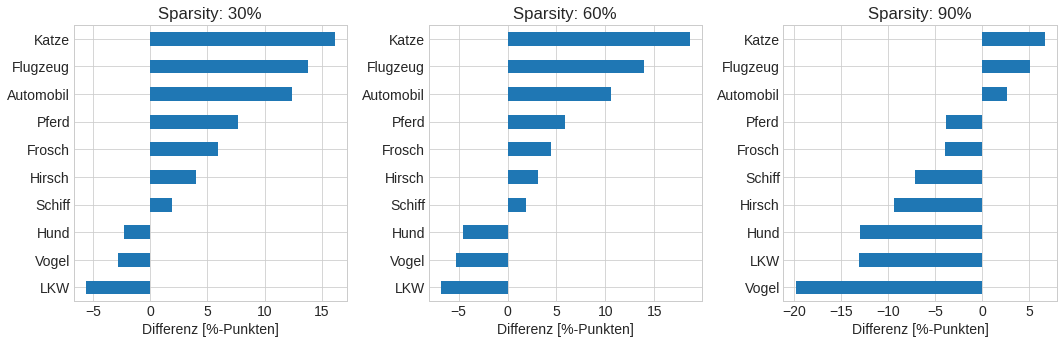

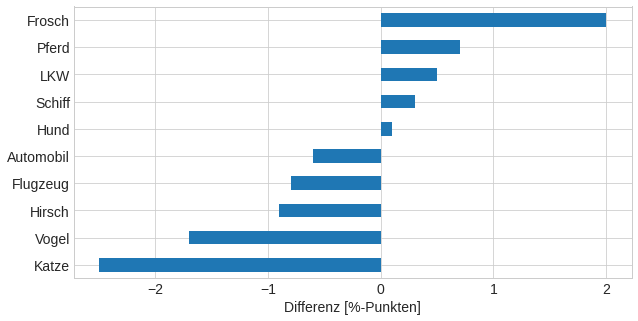

In [26]:
fig_p = plot_pruning_impact(cw_mnv1)
fig_q = plot_quantization_impact(cw_mnv1)

In [27]:
df = pd.DataFrame(index=cw_mnv1.index)

df["30%"] = (cw_mnv1["30%"] - cw_mnv1["0%"]) * 100
df["60%"] = (cw_mnv1["60%"] - cw_mnv1["0%"]) * 100
df["90%"] = (cw_mnv1["90%"] - cw_mnv1["0%"]) * 100

df.sort_values("30%")

,30%,60%,90%
LKW,-5.6,-6.8,-13.1
Vogel,-2.8,-5.3,-19.8
Hund,-2.3,-4.5,-13.0
Schiff,1.9,1.9,-7.2
Hirsch,4.0,3.1,-9.4
Frosch,5.9,4.4,-4.0
Pferd,7.7,5.9,-3.9
Automobil,12.4,10.6,2.6
Flugzeug,13.8,13.9,5.1
Katze,16.1,18.6,6.6


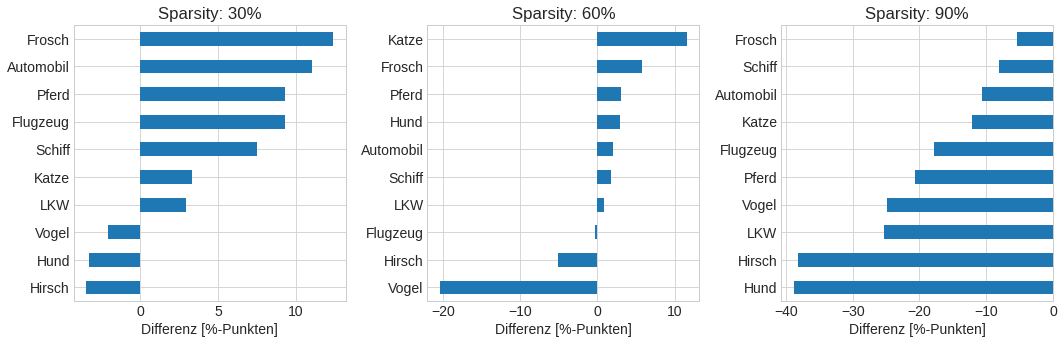

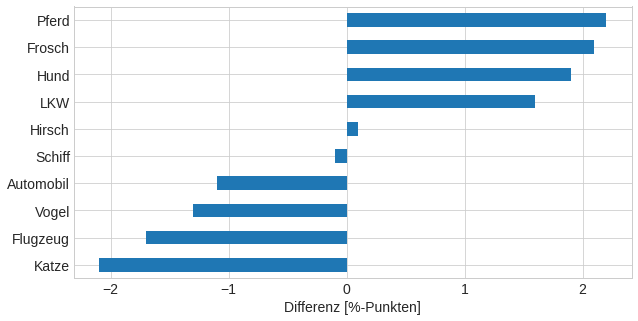

In [28]:
fig_p = plot_pruning_impact(cw_mnv2)
fig_q = plot_quantization_impact(cw_mnv2)

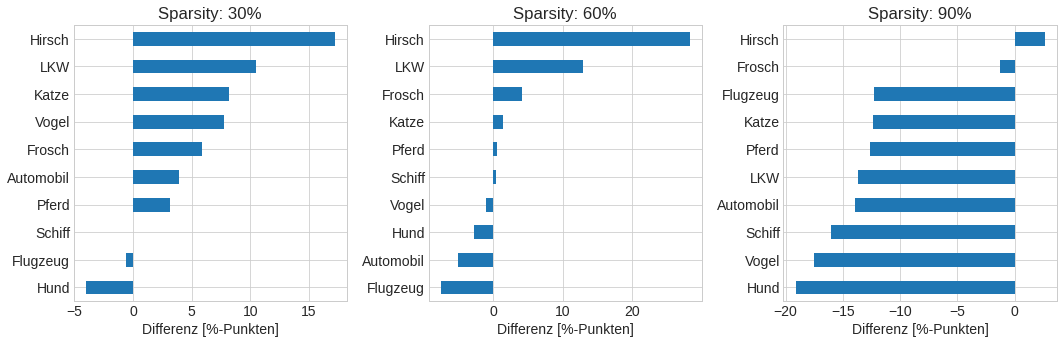

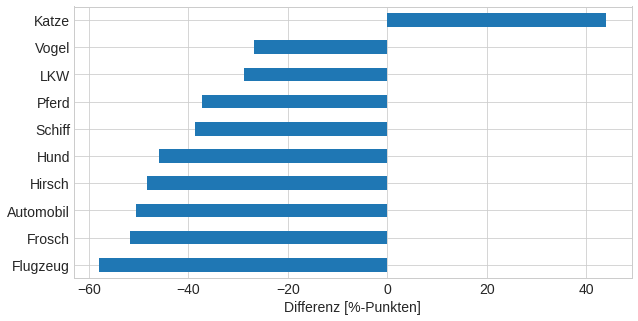

In [29]:
fig_p = plot_pruning_impact(cw_mnv3l)
fig_q = plot_quantization_impact(cw_mnv3l)

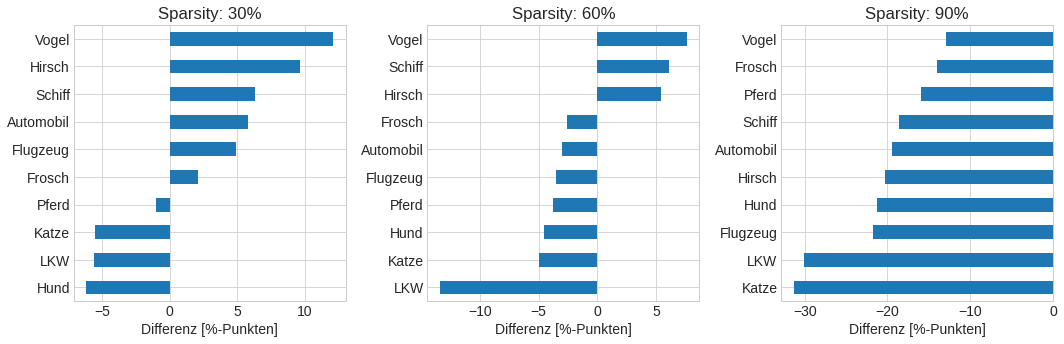

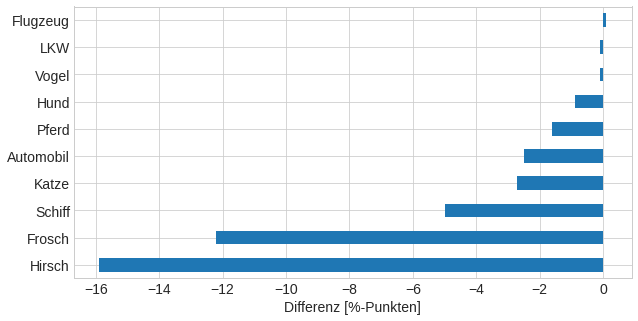

In [30]:
fig_p = plot_pruning_impact(cw_mnv3s)
fig_q = plot_quantization_impact(cw_mnv3s)

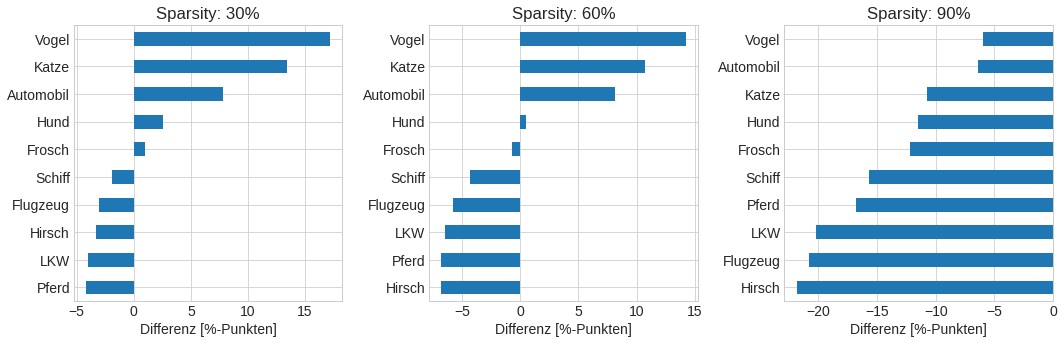

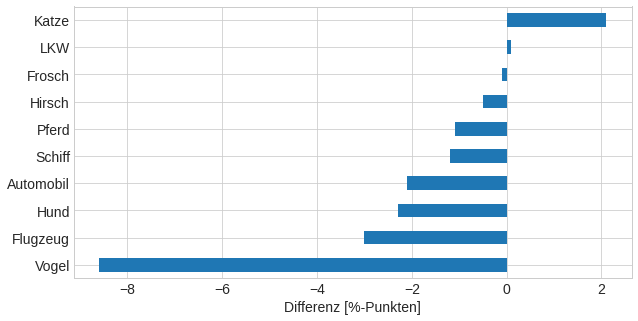

In [31]:
fig_p = plot_pruning_impact(cw_enb0)
fig_q = plot_quantization_impact(cw_enb0)

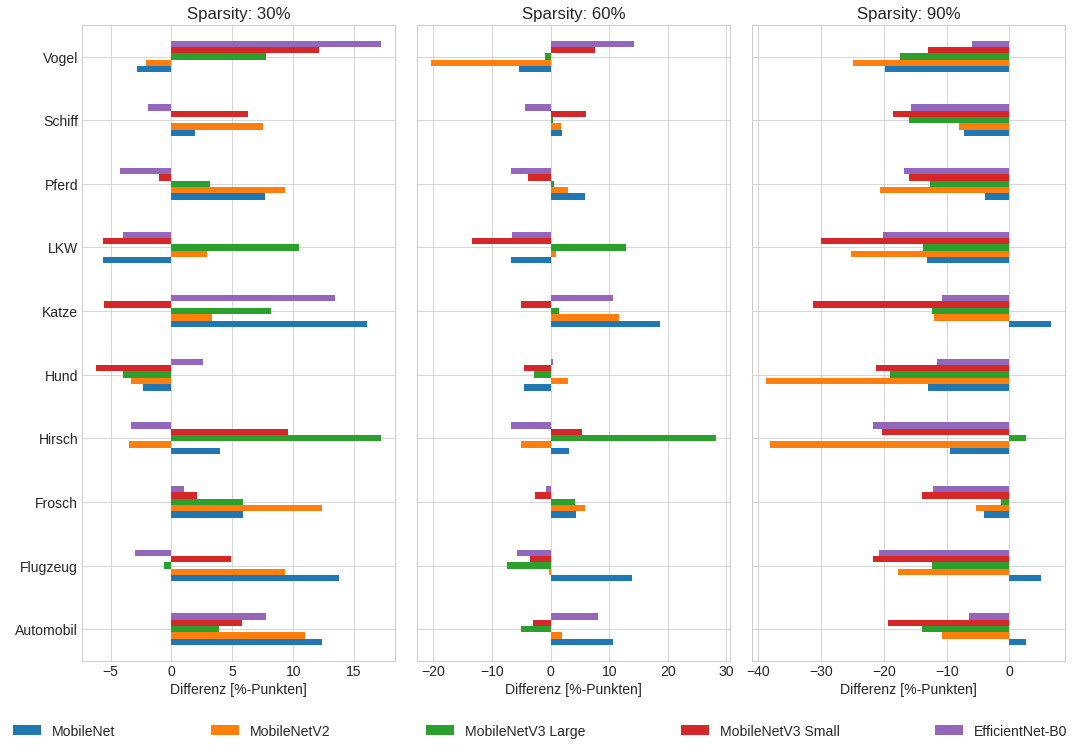

In [32]:
cw_mnv1["architectures"] = "MobileNet"
cw_mnv2["architectures"] = "MobileNetV2"
cw_mnv3l["architectures"] = "MobileNetV3 Large"
cw_mnv3s["architectures"] = "MobileNetV3 Small"
cw_enb0["architectures"] = "EfficientNet-B0"

df_combined = pd.concat([cw_mnv1, cw_mnv2, cw_mnv3l, cw_mnv3s, cw_enb0])
df_combined = df_combined.reset_index().rename(columns={"index": "class_labels"})


df_combined["30%"] = (df_combined["30%"] - df_combined["0%"]) * 100
df_combined["60%"] = (df_combined["60%"] - df_combined["0%"]) * 100
df_combined["90%"] = (df_combined["90%"] - df_combined["0%"]) * 100
df_combined["quantized"] = (df_combined["quantized"] - df_combined["0%"]) * 100

fig, axs = plt.subplots(1, 3, figsize=(15, 10), sharex=False, sharey=True)
for ax, col_sparsity in zip(axs, ["30%", "60%", "90%"]):
    ptable = pd.pivot_table(
        data=df_combined,
        values=col_sparsity,
        index="class_labels",
        columns="architectures"
    ).reindex(architecture_order, axis="columns")
    
    ptable.plot.barh(ax=ax)

    ax.set_title("Sparsity: " + col_sparsity)
    ax.set_xlabel("Differenz [%-Punkten]")
    ax.set_ylabel("")
    ax.get_legend().remove()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.tight_layout()
fig.legend(lines, labels, bbox_to_anchor=(0, 0, 1, 0), loc="upper left", mode="expand", ncol=5)

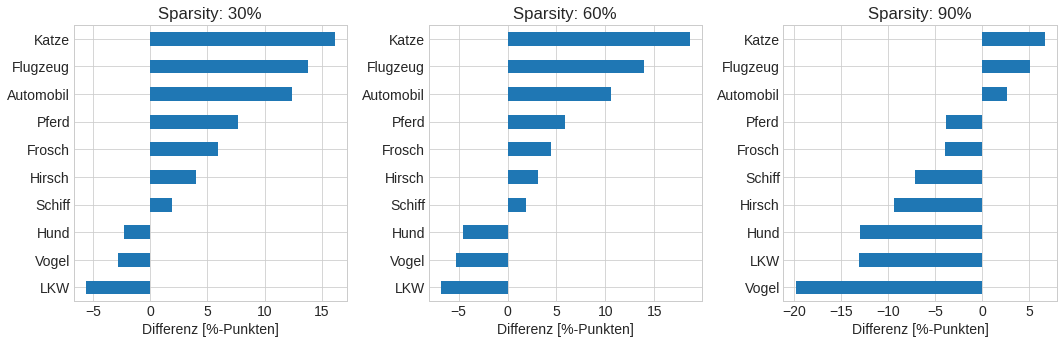

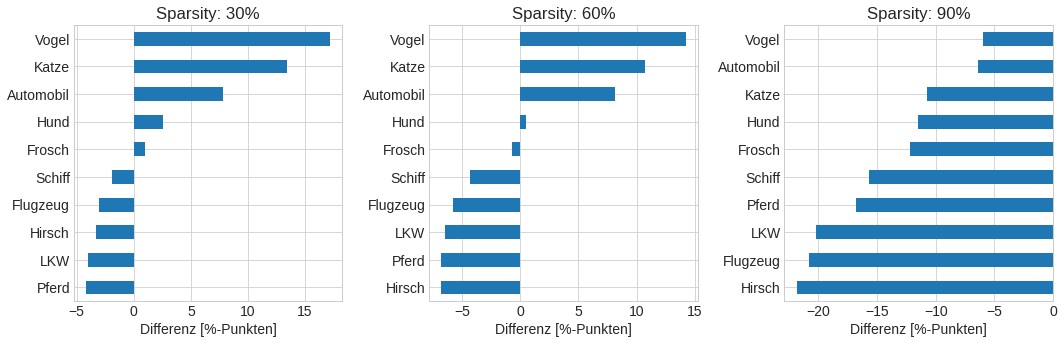

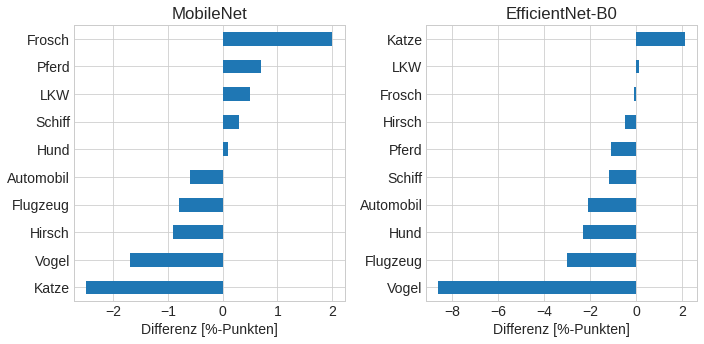

In [33]:
fig1 = plot_pruning_impact(cw_mnv1)
fig2 = plot_pruning_impact(cw_enb0)

cw_quant_mnv1 = (cw_mnv1["quantized"] - cw_mnv1["0%"]) * 100
cw_quant_mnv1 = cw_quant_mnv1.sort_values()

cw_quant_enb0 = (cw_enb0["quantized"] - cw_enb0["0%"]) * 100
cw_quant_enb0 = cw_quant_enb0.sort_values()

fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
cw_quant_mnv1.plot.barh(ax=ax1)
ax1.set_title("MobileNet")
ax1.set_xlabel("Differenz [%-Punkten]")

ax2.set_title("EfficientNet-B0")
cw_quant_enb0.plot.barh(ax=ax2)
ax2.set_xlabel("Differenz [%-Punkten]")
fig3.tight_layout()

#fig1.savefig("classwise_acc_change_pruning_mobilenet.pdf", bbox_inches='tight')
#fig2.savefig("classwise_acc_change_pruning_efficientnet-b0.pdf", bbox_inches='tight')
#fig3.savefig("classwise_acc_change_quantization.pdf", bbox_inches='tight')

In [34]:
cw_mnv1["architectures"] = "MobileNet"
cw_enb0["architectures"] = "EfficientNet-B0"

df = pd.concat([cw_mnv1, cw_enb0])
df = df.reset_index().rename(columns={"index": "class_labels"})

ptable = pd.pivot_table(
    data=df,
    values=["0%", "30%", "60%", "90%", "quantized"],
    index="class_labels",
    columns="architectures"
).swaplevel(axis="columns")

ptable = ptable.reindex([
    ("MobileNet", "0%"), ("MobileNet", "30%"), ("MobileNet", "60%"), ("MobileNet", "quantized"), 
    ("EfficientNet-B0", "0%"), ("EfficientNet-B0", "30%"), ("EfficientNet-B0", "60%"), ("EfficientNet-B0", "quantized")
], axis="columns")

ptable

architectures MobileNet                         EfficientNet-B0                \
                     0%    30%    60% quantized              0%    30%    60%   
class_labels                                                                    
Automobil         0.738  0.862  0.844     0.732           0.792  0.870  0.873   
Flugzeug          0.697  0.835  0.836     0.689           0.847  0.817  0.789   
Frosch            0.786  0.845  0.830     0.806           0.825  0.835  0.818   
Hirsch            0.724  0.764  0.755     0.715           0.785  0.752  0.717   
Hund              0.665  0.642  0.620     0.666           0.575  0.601  0.580   
Katze             0.441  0.602  0.627     0.416           0.521  0.655  0.628   
LKW               0.917  0.861  0.849     0.922           0.894  0.854  0.829   
Pferd             0.761  0.838  0.820     0.768           0.844  0.802  0.776   
Schiff            0.841  0.860  0.860     0.844           0.898  0.879  0.855   
Vogel             0.707  0.679  0.654     0.690           0.533  0.705  0.675   

architectures            
              quantized  
class_labels             
Automobil         0.771  
Flugzeug          0.817  
Frosch            0.824  
Hirsch            0.780  
Hund              0.552  
Katze             0.542  
LKW               0.895  
Pferd             0.833  
Schiff            0.886  
Vogel             0.447

In [35]:
print(ptable.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
architectures & \multicolumn{4}{l}{MobileNet} & \multicolumn{4}{l}{EfficientNet-B0} \\
{} &        0\% &    30\% &    60\% & quantized &              0\% &    30\% &    60\% & quantized \\
class\_labels &           &        &        &           &                 &        &        &           \\
\midrule
Automobil    &     0.738 &  0.862 &  0.844 &     0.732 &           0.792 &  0.870 &  0.873 &     0.771 \\
Flugzeug     &     0.697 &  0.835 &  0.836 &     0.689 &           0.847 &  0.817 &  0.789 &     0.817 \\
Frosch       &     0.786 &  0.845 &  0.830 &     0.806 &           0.825 &  0.835 &  0.818 &     0.824 \\
Hirsch       &     0.724 &  0.764 &  0.755 &     0.715 &           0.785 &  0.752 &  0.717 &     0.780 \\
Hund         &     0.665 &  0.642 &  0.620 &     0.666 &           0.575 &  0.601 &  0.580 &     0.552 \\
Katze        &     0.441 &  0.602 &  0.627 &     0.416 &           0.521 &  0.655 &  0.628 &     0.542 \\
LKW          &     0.91

## Optimierungen mittels MobileNetV3 Minimalistic

### Load data

In [36]:
metrics_mnv3mini = pd.read_csv("results/mobilenetv3_minimalistic_metrics.csv", sep=";")

metrics = metrics.append(metrics_mnv3mini, ignore_index=True)

metrics_mnv3 = metrics[metrics["architectures"].str.match("MobileNetV3.*")]
metrics_mnv3 = metrics_mnv3.set_index("architectures").rename(index={
    "MobileNetV3 Large": "Large",
    "MobileNetV3 Small": "Small",
    "MobileNetV3 Large (minimalistic)": "Large (mini.)",
    "MobileNetV3 Small (minimalistic)": "Small (mini.)"
}).reset_index()
metrics_mnv3

,architectures,sparsity,quantized,params,nonzero_params,actual_sparsity,loss,top-1,top-3,val_loss,val_top-1,val_top-3,file_size,inference_time,peak_mem,compressed_file_size
0,Large,0.0,0,4239242,4239242,0.0000,0.6464,0.7749,0.9485,0.9669,0.6934,0.9064,16.8829,8051.00,20.41410,15.6894
1,Large,0.3,0,4239242,3164969,0.2534,0.4002,0.8625,0.9773,0.7791,0.7455,0.9340,16.8829,7992.00,20.41800,12.7800
2,Large,0.6,0,4239242,1874706,0.5578,0.5239,0.8154,0.9663,0.8218,0.7247,0.9302,16.8829,8098.00,20.37500,8.4288
3,Large,0.9,0,4239242,613576,0.8553,1.1601,0.5879,0.8677,1.2000,0.5772,0.8625,16.8829,8048.00,20.47270,3.5205
4,Large,0.0,1,4239242,4239242,0.0000,1.7447,0.4184,0.7951,1.8544,0.3963,0.7743,4.9440,5259.00,6.93359,3.9812
5,Large,0.3,1,4239242,3164969,0.2534,0.5582,0.8249,0.9660,1.0082,0.7260,0.9265,4.9440,5243.00,6.97270,3.6720
6,Large,0.6,1,4239242,1874706,0.5578,0.6583,0.7854,0.9579,0.9867,0.7046,0.9194,4.9440,5292.00,6.98050,2.7480
7,Large,0.9,1,4239242,613576,0.8553,1.3965,0.5457,0.8478,1.4469,0.5341,0.8406,4.9440,5263.00,6.97660,1.2544
8,Small,0.0,0,1540218,1540218,0.0000,0.7061,0.7530,0.9451,0.9961,0.6687,0.9033,6.1536,2954.00,8.58590,5.6994
9,Small,0.3,0,1540218,1158678,0.2477,0.5670,0.8026,0.9579,0.8984,0.6912,0.9177,6.1536,2914.00,8.62110,4.6611


### Zusammenfassung der MobileNetV3 Minimalistic Architekturen nach dem Training

In [37]:
col_names = fancy_columns.copy()
col_names["architectures"] = "MobileNetV3 Mini."
col_names["val_top-1"] = "Top-1"
col_names["val_top-3"] = "Top-3"

df = metrics_mnv3mini.set_index("architectures").rename(
    index={"MobileNetV3 Large (minimalistic)" : "Large", "MobileNetV3 Small (minimalistic)" : "Small"}
)

df["params"] = df["params"].map(lambda x: "{:.1f} Mio.".format(x/1e6))
df = df[(df["sparsity"] == 0.0) & (df["quantized"] == 0)][["params", "val_top-1", "val_top-3", "file_size", "peak_mem", "inference_time"]]
df = df.reset_index().rename(columns=col_names)
df

,MobileNetV3 Mini.,Parameter,Top-1,Top-3,Datei [MB],RAM [MB],Inferenz [µs]
0,Large,2.7 Mio.,0.6949,0.9128,10.6120,14.2344,5296.52
1,Small,1.0 Mio.,0.6099,0.8755,4.1234,6.1797,1825.79


In [38]:
print(df.to_latex(index=False))

\begin{tabular}{llrrrrr}
\toprule
MobileNetV3 Mini. & Parameter &  Top-1 &  Top-3 &  Datei [MB] &  RAM [MB] &  Inferenz [µs] \\
\midrule
            Large &  2.7 Mio. & 0.6949 & 0.9128 &     10.6120 &   14.2344 &        5296.52 \\
            Small &  1.0 Mio. & 0.6099 & 0.8755 &      4.1234 &    6.1797 &        1825.79 \\
\bottomrule
\end{tabular}



### Quantisierung

In [39]:
col_names = fancy_columns.copy()
col_names["architectures"] = "MobileNetV3 Mini."
col_names["val_top-1"] = "Top-1"
col_names["val_top-3"] = "Top-3"

df = metrics_mnv3mini.set_index("architectures").rename(
    index={"MobileNetV3 Large (minimalistic)" : "Large", "MobileNetV3 Small (minimalistic)" : "Small"}
)

df["params"] = df["params"].map(lambda x: "{:.1f} Mio.".format(x/1e6))
df = df[(df["sparsity"] == 0.0) & (df["quantized"] == 1)][["params", "val_top-1", "val_top-3", "file_size", "peak_mem", "inference_time"]]
df = df.reset_index().rename(columns=col_names)
df

,MobileNetV3 Mini.,Parameter,Top-1,Top-3,Datei [MB],RAM [MB],Inferenz [µs]
0,Large,2.7 Mio.,0.7050,0.9269,3.1612,5.57420,2838.57
1,Small,1.0 Mio.,0.6343,0.8879,1.3065,4.37891,1117.71


In [40]:
print(df.to_latex(index=False))

\begin{tabular}{llrrrrr}
\toprule
MobileNetV3 Mini. & Parameter &  Top-1 &  Top-3 &  Datei [MB] &  RAM [MB] &  Inferenz [µs] \\
\midrule
            Large &  2.7 Mio. & 0.7050 & 0.9269 &      3.1612 &   5.57420 &        2838.57 \\
            Small &  1.0 Mio. & 0.6343 & 0.8879 &      1.3065 &   4.37891 &        1117.71 \\
\bottomrule
\end{tabular}



Text(0, 0.5, 'Veränderung [%]')

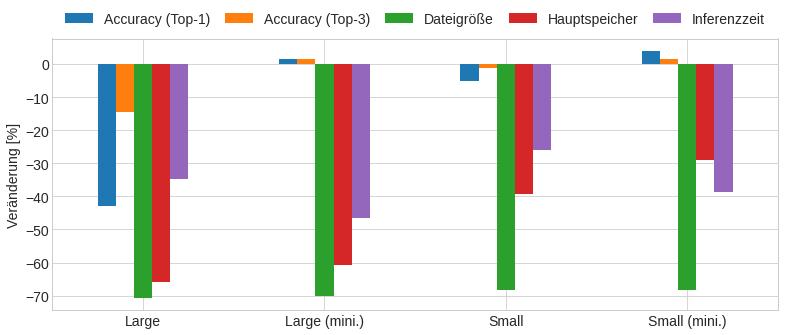

In [41]:
df_not_q = metrics_mnv3[(metrics_mnv3["quantized"] == 0) & (metrics_mnv3["sparsity"] == 0)]
df_not_q = df_not_q[["architectures", "val_top-1", "val_top-3", "file_size", "peak_mem", "inference_time"]]
df_not_q = df_not_q.set_index("architectures")

df_quant = metrics_mnv3[(metrics_mnv3["quantized"] == 1) & (metrics_mnv3["sparsity"] == 0)]
df_quant = df_quant[["architectures", "val_top-1", "val_top-3", "file_size", "peak_mem", "inference_time"]]
df_quant = df_quant.set_index("architectures")

df_quant["impr_val_top-1"] = (df_quant["val_top-1"] / df_not_q["val_top-1"] - 1) * 100
df_quant["impr_val_top-3"] = (df_quant["val_top-3"] / df_not_q["val_top-3"] - 1) * 100
df_quant["impr_file_size"] = (df_quant["file_size"] / df_not_q["file_size"] - 1) * 100
df_quant["impr_peak_mem"] = (df_quant["peak_mem"] / df_not_q["peak_mem"] - 1) * 100
df_quant["impr_inference_time"] = (df_quant["inference_time"] / df_not_q["inference_time"] - 1) * 100

col_names = {
    "impr_val_top-1" : "Accuracy (Top-1)",
    "impr_val_top-3" : "Accuracy (Top-3)",
    "impr_file_size" : "Dateigröße",
    "impr_peak_mem" : "Hauptspeicher",
    "impr_inference_time" : "Inferenzzeit"
}

df = df_quant[["impr_val_top-1", "impr_val_top-3", "impr_file_size", "impr_peak_mem", "impr_inference_time"]]
df = df.rename(columns=col_names).sort_index()

fig, ax = plt.subplots(1, figsize=(13, 5))
df.plot.bar(ax=ax, rot=0)
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=5)
ax.set_xlabel("")
ax.set_ylabel("Veränderung [%]")

#fig.savefig("quantization_improvements_mnv3mini.pdf", bbox_inches='tight')

In [42]:
df

,Accuracy (Top-1),Accuracy (Top-3),Dateigröße,Hauptspeicher,Inferenzzeit
architectures,,,,,
Large,-42.846842,-14.574139,-70.715932,-66.035289,-34.678922
Large (mini.),1.453447,1.544698,-70.211082,-60.839937,-46.406886
Small,-5.054584,-1.184546,-68.247855,-39.399481,-26.100203
Small (mini.),4.000656,1.416334,-68.314983,-29.140411,-38.782116


### Pruned

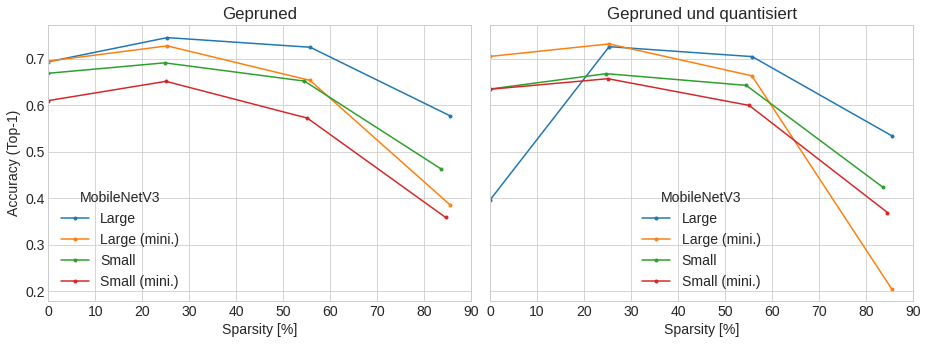

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True, sharex=True)

# Not quantized
df_all = metrics_mnv3[metrics_mnv3["quantized"] == 0]
df_all = df_all[["architectures", "actual_sparsity", "val_top-1"]]
df_all["actual_sparsity"] *= 100 
df_all_grouped = df_all.groupby("architectures")

for label, df in df_all_grouped:
    df.plot(x="actual_sparsity", y="val_top-1", marker=".", ax=ax1, label=label)

ax1.set_title("Gepruned")
ax1.set_xlabel("Sparsity [%]")
ax1.set_ylabel("Accuracy (Top-1)")
ax1.legend(title="MobileNetV3")
ax1.set_xlim(0, 90)

# Quantized
df_all = metrics_mnv3[metrics_mnv3["quantized"] == 1]
df_all = df_all[["architectures", "actual_sparsity", "val_top-1"]]
df_all["actual_sparsity"] *= 100 
df_all_grouped = df_all.groupby("architectures")

for label, df in df_all_grouped:
    df.plot(x="actual_sparsity", y="val_top-1", marker=".", ax=ax2, label=label)

ax2.set_title("Gepruned und quantisiert")
ax2.set_xlabel("Sparsity [%]")
ax2.set_ylabel("Accuracy (Top-1)")
ax2.legend(title="MobileNetV3")
ax2.set_xlim(0, 90)

fig.tight_layout()

#
# fig.savefig("sparsity_vs_accuracy_mnv3mini.pdf", bbox_inches='tight')

Text(0, 0.5, 'Komprimierte Dateigröße [MB]')

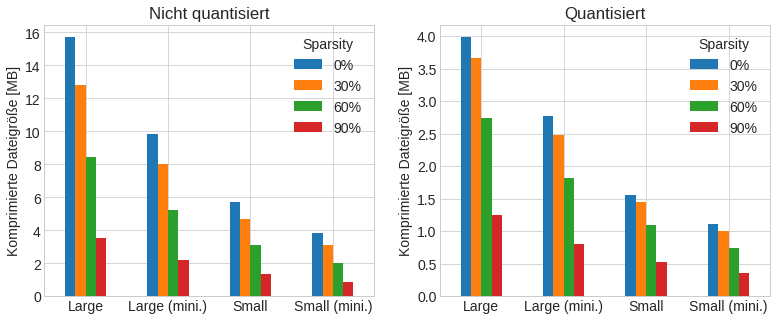

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

df = metrics_mnv3[metrics_mnv3["quantized"] == 0][["architectures", "sparsity", "compressed_file_size"]]
df["sparsity"] = df["sparsity"].map(lambda x: "{}%".format(int(x*100)))

ptable = pd.pivot_table(
    data=df,
    values="compressed_file_size",
    index="architectures",
    columns="sparsity"
)

ptable.plot.bar(ax=ax1, rot=0)
ax1.set_title("Nicht quantisiert")
ax1.legend(title="Sparsity")
ax1.set_xlabel("")
ax1.set_ylabel("Komprimierte Dateigröße [MB]")


df = metrics_mnv3[metrics_mnv3["quantized"] == 1][["architectures", "sparsity", "compressed_file_size"]]
df["sparsity"] = df["sparsity"].map(lambda x: "{}%".format(int(x*100)))

ptable = pd.pivot_table(
    data=df,
    values="compressed_file_size",
    index="architectures",
    columns="sparsity"
)

ptable.plot.bar(ax=ax2, rot=0)
ax2.set_title("Quantisiert")
ax2.legend(title="Sparsity")
ax2.set_xlabel("")
ax2.set_ylabel("Komprimierte Dateigröße [MB]")

#fig.savefig("pruned_and_compressed_mnv3mini.pdf", bbox_inches='tight')

In [45]:
metrics_mnv3mini

,architectures,sparsity,quantized,params,nonzero_params,actual_sparsity,loss,top-1,top-3,val_loss,val_top-1,val_top-3,file_size,inference_time,peak_mem,compressed_file_size
0,MobileNetV3 Large (minimalistic),0.0,0,2680498,2680498,0.0000,0.4660,0.8388,0.9757,1.1438,0.6949,0.9128,10.6120,5296.52,14.23440,9.8273
1,MobileNetV3 Large (minimalistic),0.3,0,2680498,2001865,0.2532,0.2477,0.9139,0.9908,0.9641,0.7277,0.9273,10.6120,5147.52,14.35550,7.9897
2,MobileNetV3 Large (minimalistic),0.6,0,2680498,1186790,0.5573,0.8310,0.7254,0.9348,1.0289,0.6534,0.8992,10.6120,5355.92,14.07030,5.2256
3,MobileNetV3 Large (minimalistic),0.9,0,2680498,390118,0.8545,1.7011,0.3941,0.7330,1.7248,0.3863,0.7317,10.6120,5074.65,14.41020,2.1741
4,MobileNetV3 Large (minimalistic),0.0,1,2680498,2680498,0.0000,0.5075,0.8479,0.9781,1.4320,0.7050,0.9269,3.1612,2838.57,5.57420,2.7666
5,MobileNetV3 Large (minimalistic),0.3,1,2680498,2001865,0.2532,0.2560,0.9165,0.9917,1.2013,0.7319,0.9351,3.1612,2868.45,5.73440,2.4800
6,MobileNetV3 Large (minimalistic),0.6,1,2680498,1186790,0.5573,0.7910,0.7358,0.9384,1.0235,0.6633,0.9041,3.1612,2833.45,6.00390,1.8201
7,MobileNetV3 Large (minimalistic),0.9,1,2680498,390118,0.8545,3.1007,0.2046,0.6152,3.1187,0.2052,0.6154,3.1612,2832.66,5.59380,0.8068
8,MobileNetV3 Small (minimalistic),0.0,0,1042098,1042098,0.0000,0.8687,0.7015,0.9283,1.2441,0.6099,0.8755,4.1234,1825.79,6.17970,3.8070
9,MobileNetV3 Small (minimalistic),0.3,0,1042098,780982,0.2506,0.6537,0.7660,0.9511,1.0396,0.6514,0.8947,4.1234,1784.35,6.00780,3.0965
